<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-03 13:30:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-09-03 13:30:21 (11.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,  # parse_dates parametresi, belirli sütunların tarih ve saat olarak ayrılması gerektiğini belirtir. Bu durumda, "Date" sütunu tarih ve saat olarak ayrılacak.
index_col = ["Date"]     # index_col parametresi, veri çerçevesinin hangi sütununun endeks (indeks) olarak kullanılacağını belirtir. Bu durumda, "Date" sütunu endeks olarak kullanılacak, yani her satırın bir tarih ve saat indeksi olacak.
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [6]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


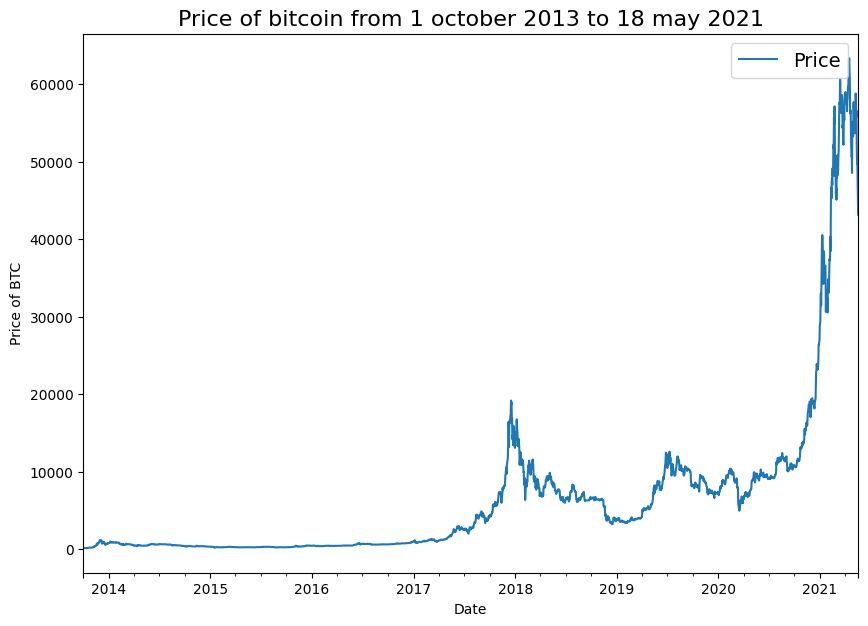

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [8]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

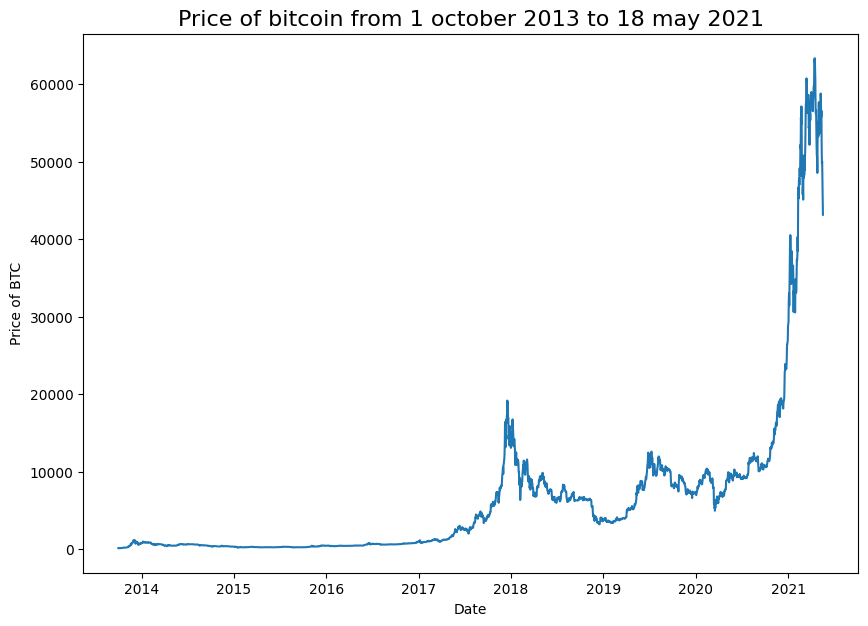

In [9]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

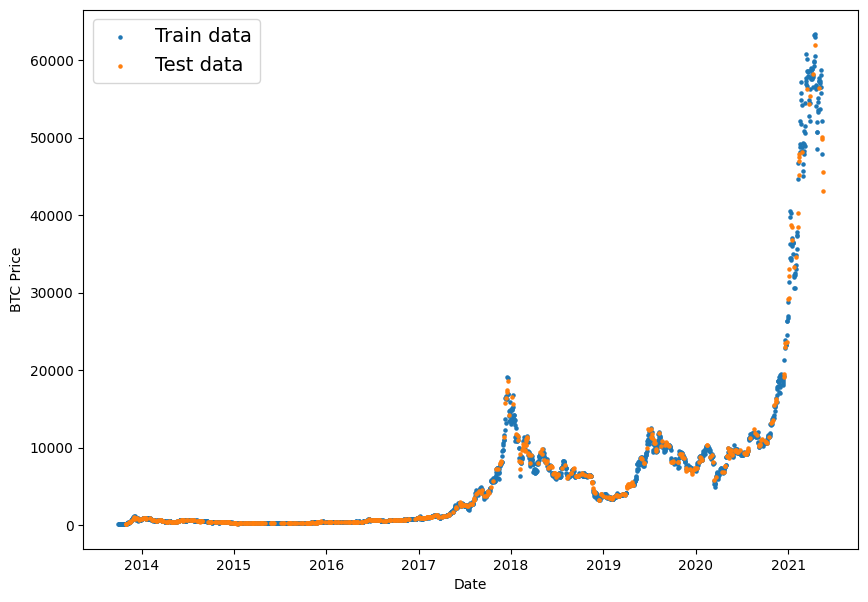

In [12]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [13]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

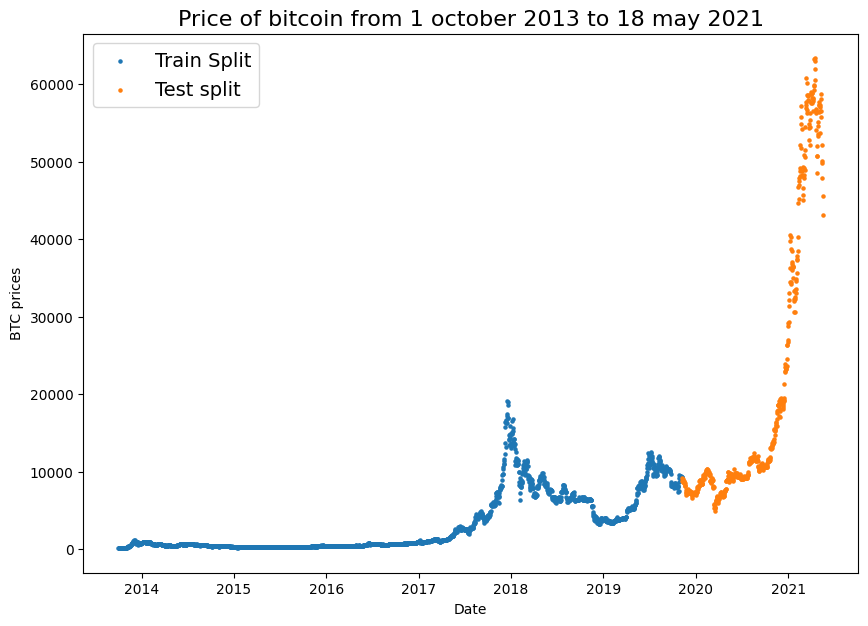

In [14]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [15]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


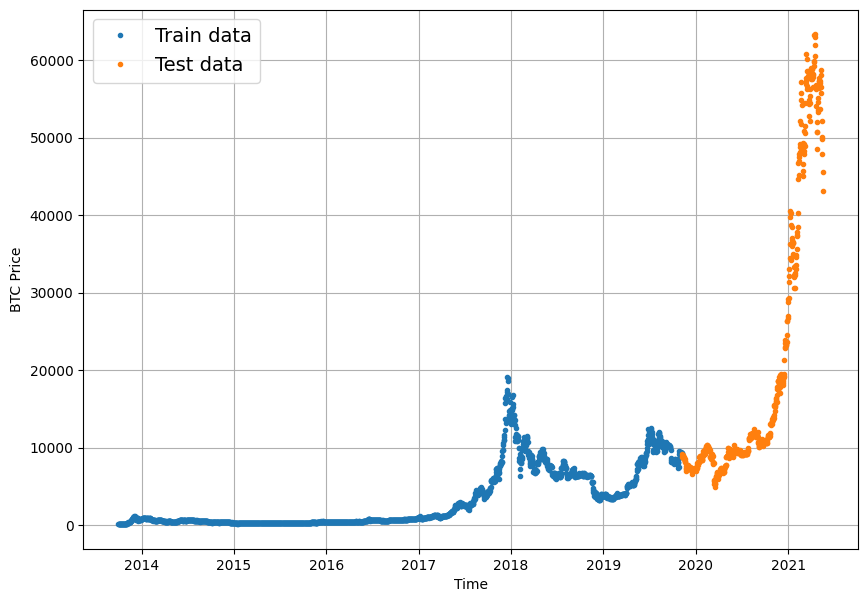

In [16]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [17]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

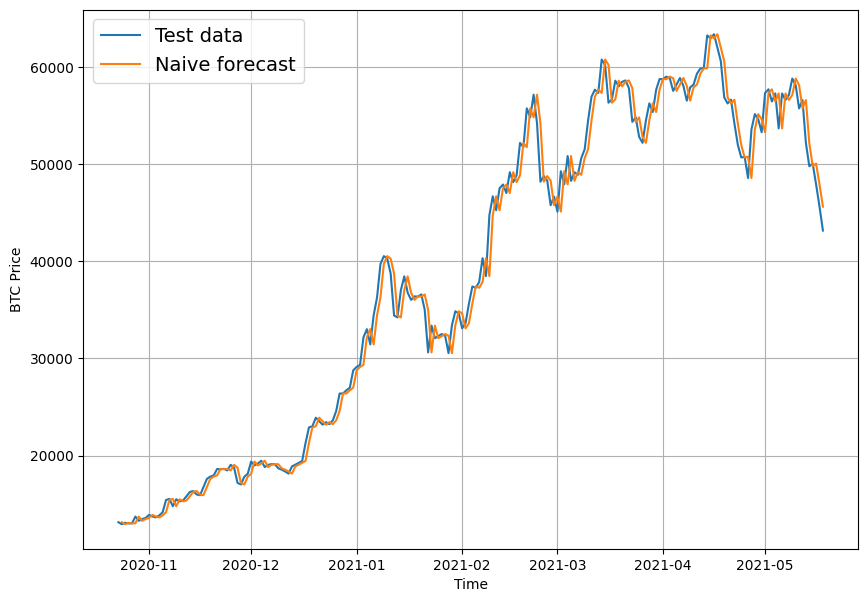

In [19]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [22]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [23]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [24]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [25]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [26]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [28]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [29]:
import numpy as np

In [30]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [31]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [32]:
len(prices)

2787

In [33]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [34]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [35]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [36]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [37]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 3650.6526 - mae: 3650.6526  

18/18 [==============================] - 6s 98ms/step - loss: 3305.4448 - mae: 3305.4448 - val_loss: 7345.2021 - val_mae: 7345.2021
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 511.7195 - mae: 511.7195

18/18 [==============================] - 2s 104ms/step - loss: 500.3037 - mae: 500.3037 - val_loss: 1311.6785 - val_mae: 1311.6785
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 247.9319 - mae: 247.9319

18/18 [==============================] - 2s 135ms/step - loss: 236.7152 - mae: 236.7152 - val_loss: 1182.5592 - val_mae: 1182.5592
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 208.3520 - mae: 208.3520

18/18 [==============================] - 2s 132ms/step - loss: 208.6856 - mae: 208.6856 - val_loss: 1115.9316 - val_mae: 1115.9316
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 208.0005 - mae: 208.0005

18/18 [==============================] - 2s 107ms/step - loss: 196.4244 - mae: 196.4244 - val_loss: 1074.6768 - val_mae: 1074.6768
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 189.2098 - mae: 189.2098

18/18 [==============================] - 1s 86ms/step - loss: 192.4008 - mae: 192.4008 - val_loss: 1072.2961 - val_mae: 1072.2961
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 200.5749 - mae: 200.5749

18/18 [==============================] - 2s 91ms/step - loss: 188.2139 - mae: 188.2139 - val_loss: 1044.1589 - val_mae: 1044.1589
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 183.4564 - mae: 183.4564

18/18 [==============================] - 2s 138ms/step - loss: 184.0098 - mae: 184.0098 - val_loss: 1021.9224 - val_mae: 1021.9224
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 180.6740 - mae: 180.6740

18/18 [==============================] - 2s 98ms/step - loss: 177.6674 - mae: 177.6674 - val_loss: 1010.6875 - val_mae: 1010.6875
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 168.5949 - mae: 168.5949

18/18 [==============================] - 3s 199ms/step - loss: 174.1719 - mae: 174.1719 - val_loss: 974.5521 - val_mae: 974.5521
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 169.5305 - mae: 169.5305

18/18 [==============================] - 2s 114ms/step - loss: 167.5247 - mae: 167.5247 - val_loss: 916.2747 - val_mae: 916.2746
Epoch 12/100
18/18 [==============================] - 0s 16ms/step - loss: 162.1109 - mae: 162.1109 - val_loss: 990.6811 - val_mae: 990.6811
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 152.1899 - mae: 152.1899

18/18 [==============================] - 2s 94ms/step - loss: 159.2739 - mae: 159.2739 - val_loss: 910.0621 - val_mae: 910.0621
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 150.5767 - mae: 150.5767

18/18 [==============================] - 2s 98ms/step - loss: 152.9635 - mae: 152.9635 - val_loss: 854.8313 - val_mae: 854.8313
Epoch 15/100
18/18 [==============================] - 0s 11ms/step - loss: 150.7645 - mae: 150.7645 - val_loss: 908.1520 - val_mae: 908.1520
Epoch 16/100
18/18 [==============================] - 0s 15ms/step - loss: 146.9654 - mae: 146.9654 - val_loss: 859.1841 - val_mae: 859.1841
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 141.4732 - mae: 141.4732

18/18 [==============================] - 2s 90ms/step - loss: 142.5426 - mae: 142.5426 - val_loss: 841.3008 - val_mae: 841.3008
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 148.2740 - mae: 148.2740

18/18 [==============================] - 1s 66ms/step - loss: 140.9893 - mae: 140.9893 - val_loss: 773.7175 - val_mae: 773.7175
Epoch 19/100
12/18 [===================>..........] - ETA: 0s - loss: 138.8201 - mae: 138.8201

18/18 [==============================] - 1s 81ms/step - loss: 133.6579 - mae: 133.6579 - val_loss: 762.5457 - val_mae: 762.5457
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 138.6563 - mae: 138.6563

18/18 [==============================] - 2s 102ms/step - loss: 135.4896 - mae: 135.4896 - val_loss: 715.5021 - val_mae: 715.5021
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 134.1455 - mae: 134.1455

18/18 [==============================] - 1s 33ms/step - loss: 133.8457 - mae: 133.8457 - val_loss: 708.5625 - val_mae: 708.5625
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 178.0134 - mae: 178.0134

18/18 [==============================] - 1s 30ms/step - loss: 128.7877 - mae: 128.7877 - val_loss: 691.8256 - val_mae: 691.8256
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 126.7548 - mae: 126.7548

18/18 [==============================] - 1s 31ms/step - loss: 126.7548 - mae: 126.7548 - val_loss: 681.8386 - val_mae: 681.8386
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 137.4156 - mae: 137.4156

18/18 [==============================] - 1s 30ms/step - loss: 126.0611 - mae: 126.0611 - val_loss: 669.4169 - val_mae: 669.4169
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6505 - mae: 127.6505

18/18 [==============================] - 1s 29ms/step - loss: 122.6784 - mae: 122.6784 - val_loss: 666.3643 - val_mae: 666.3643
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 129.7389 - mae: 129.7389

18/18 [==============================] - 1s 45ms/step - loss: 124.8426 - mae: 124.8426 - val_loss: 658.9512 - val_mae: 658.9512
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 171.5339 - mae: 171.5339

18/18 [==============================] - 1s 30ms/step - loss: 124.8356 - mae: 124.8356 - val_loss: 652.7411 - val_mae: 652.7411
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 120.1281 - mae: 120.1281

18/18 [==============================] - 1s 30ms/step - loss: 119.8193 - mae: 119.8193 - val_loss: 645.5842 - val_mae: 645.5842
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 115.1047 - mae: 115.1047

18/18 [==============================] - 1s 30ms/step - loss: 117.8849 - mae: 117.8849 - val_loss: 638.3335 - val_mae: 638.3335
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 134.7710 - mae: 134.7710

18/18 [==============================] - 1s 30ms/step - loss: 122.4809 - mae: 122.4809 - val_loss: 634.6194 - val_mae: 634.6194
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9013 - mae: 128.9013

18/18 [==============================] - 1s 30ms/step - loss: 116.2422 - mae: 116.2422 - val_loss: 632.9189 - val_mae: 632.9189
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 110.5248 - mae: 110.5248

18/18 [==============================] - 1s 31ms/step - loss: 116.3867 - mae: 116.3867 - val_loss: 624.9512 - val_mae: 624.9512
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3907 - mae: 116.3907 - val_loss: 685.9432 - val_mae: 685.9432
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 151.0630 - mae: 151.0630

18/18 [==============================] - 1s 30ms/step - loss: 118.4982 - mae: 118.4982 - val_loss: 607.9025 - val_mae: 607.9025
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 114.3450 - mae: 114.3450

18/18 [==============================] - 1s 30ms/step - loss: 113.9831 - mae: 113.9831 - val_loss: 604.3701 - val_mae: 604.3701
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 120.9250 - mae: 120.9250 - val_loss: 604.6353 - val_mae: 604.6353
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 137.3599 - mae: 137.3599

18/18 [==============================] - 1s 30ms/step - loss: 115.4140 - mae: 115.4140 - val_loss: 600.8864 - val_mae: 600.8864
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 114.0208 - mae: 114.0208 - val_loss: 603.6495 - val_mae: 603.6495
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9487 - mae: 128.9487

18/18 [==============================] - 1s 30ms/step - loss: 113.1846 - mae: 113.1846 - val_loss: 596.4512 - val_mae: 596.4512
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1923 - mae: 112.1923 - val_loss: 614.4542 - val_mae: 614.4542
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5642 - mae: 113.5642 - val_loss: 610.6757 - val_mae: 610.6757
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2772 - mae: 115.2772 - val_loss: 618.5978 - val_mae: 618.5978
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8314 - mae: 113.8314 - val_loss: 616.3868 - val_mae: 616.3868
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3424 - mae: 113.3424 - val_loss: 612.0521 - val_mae: 612.0521
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1486 - mae: 112.1486 - val_loss: 606.6526 - val_mae: 606.6526
Epoch 46/100
 1/18 [>...........

18/18 [==============================] - 1s 35ms/step - loss: 111.7204 - mae: 111.7204 - val_loss: 587.9968 - val_mae: 587.9968
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 110.4611 - mae: 110.4611 - val_loss: 617.7783 - val_mae: 617.7783
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 110.8057 - mae: 110.8057 - val_loss: 607.3689 - val_mae: 607.3689
Epoch 49/100
13/18 [====================>.........] - ETA: 0s - loss: 120.2645 - mae: 120.2645

18/18 [==============================] - 1s 44ms/step - loss: 115.6691 - mae: 115.6691 - val_loss: 583.4857 - val_mae: 583.4857
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7255 - mae: 113.7255 - val_loss: 634.1848 - val_mae: 634.1848
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8736 - mae: 111.8736 - val_loss: 591.9200 - val_mae: 591.9200
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3055 - mae: 114.3055 - val_loss: 585.1468 - val_mae: 585.1468
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 112.5565 - mae: 112.5565 - val_loss: 658.7150 - val_mae: 658.7150
Epoch 54/100
15/18 [========================>.....] - ETA: 0s - loss: 115.0885 - mae: 115.0885

18/18 [==============================] - 1s 37ms/step - loss: 113.8419 - mae: 113.8419 - val_loss: 579.4203 - val_mae: 579.4203
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 113.6973 - mae: 113.6973 - val_loss: 627.1267 - val_mae: 627.1267
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7241 - mae: 116.7241 - val_loss: 877.8864 - val_mae: 877.8864
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 144.4648 - mae: 144.4648 - val_loss: 708.8640 - val_mae: 708.8640
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2716 - mae: 119.2716 - val_loss: 584.7175 - val_mae: 584.7175
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1824 - mae: 111.1824 - val_loss: 593.7888 - val_mae: 593.7888
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0957 - mae: 111.0957 - val_loss: 585.8264 - val_mae: 585.8264
Epoch 61/100
 1/18 [>...........

18/18 [==============================] - 1s 30ms/step - loss: 109.6811 - mae: 109.6811 - val_loss: 576.4992 - val_mae: 576.4992
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6735 - mae: 107.6735 - val_loss: 577.2372 - val_mae: 577.2372
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3752 - mae: 110.3752 - val_loss: 590.0699 - val_mae: 590.0699
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8973 - mae: 108.8973 - val_loss: 615.3634 - val_mae: 615.3634
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8680 - mae: 111.8680 - val_loss: 577.9489 - val_mae: 577.9489
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1451 - mae: 108.1451 - val_loss: 578.4874 - val_mae: 578.4874
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6878 - mae: 108.6878 - val_loss: 665.7964 - val_mae: 665.7964
Epoch 68/100
 1/18 [>...........

18/18 [==============================] - 1s 30ms/step - loss: 109.2824 - mae: 109.2824 - val_loss: 572.9050 - val_mae: 572.9050
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9464 - mae: 109.9464 - val_loss: 683.6836 - val_mae: 683.6836
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4745 - mae: 119.4745 - val_loss: 577.3746 - val_mae: 577.3746
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 85.5555 - mae: 85.5555

18/18 [==============================] - 1s 46ms/step - loss: 111.8488 - mae: 111.8488 - val_loss: 570.0862 - val_mae: 570.0862
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6789 - mae: 109.6789 - val_loss: 572.3519 - val_mae: 572.3519
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0366 - mae: 112.0366 - val_loss: 576.3696 - val_mae: 576.3696
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9453 - mae: 110.9453 - val_loss: 570.4506 - val_mae: 570.4506
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2755 - mae: 110.2755 - val_loss: 589.0036 - val_mae: 589.0036
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1501 - mae: 114.1501 - val_loss: 629.3962 - val_mae: 629.3962
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 90.9230 - mae: 90.9230

18/18 [==============================] - 1s 30ms/step - loss: 107.9945 - mae: 107.9945 - val_loss: 569.6733 - val_mae: 569.6733
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7173 - mae: 110.7173 - val_loss: 614.0422 - val_mae: 614.0422
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 112.6832 - mae: 112.6832

18/18 [==============================] - 1s 29ms/step - loss: 111.6611 - mae: 111.6611 - val_loss: 568.1886 - val_mae: 568.1886
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3838 - mae: 107.3838 - val_loss: 582.2407 - val_mae: 582.2407
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0969 - mae: 107.0969 - val_loss: 587.1750 - val_mae: 587.1750
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7209 - mae: 116.7209 - val_loss: 614.9492 - val_mae: 614.9492
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3418 - mae: 119.3418 - val_loss: 643.3499 - val_mae: 643.3499
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 114.8273 - mae: 114.8273 - val_loss: 572.7225 - val_mae: 572.7225
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0246 - mae: 108.0246 - val_loss: 573.5653 - val_mae: 573.5653
Epoch 86/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 110.1686 - mae: 110.1686 - val_loss: 565.2191 - val_mae: 565.2191
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4018 - mae: 110.4018 - val_loss: 604.9164 - val_mae: 604.9164
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9181 - mae: 107.9181 - val_loss: 645.1382 - val_mae: 645.1382
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1141 - mae: 114.1141 - val_loss: 642.0262 - val_mae: 642.0262
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5481 - mae: 109.5481 - val_loss: 593.0769 - val_mae: 593.0769
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 117.9677 - mae: 117.9677 - val_loss: 612.7795 - val_mae: 612.7795
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4764 - mae: 114.4764 - val_loss: 628.1895 - val_mae: 628.1895
Epoch 95/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 107.4743 - mae: 107.4743 - val_loss: 563.4155 - val_mae: 563.4155
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9898 - mae: 113.9898 - val_loss: 684.7122 - val_mae: 684.7122


In [39]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 684.7122 - mae: 684.7122


[684.712158203125, 684.712158203125]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 563.4155 - mae: 563.4155


[563.4154663085938, 563.4154663085938]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [41]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 2ms/step


array([[ 8866.964 ],
       [ 8798.822 ],
       [ 9020.455 ],
       [ 8797.367 ],
       [ 8783.836 ],
       [ 8715.15  ],
       [ 8696.18  ],
       [ 8542.727 ],
       [ 8466.022 ],
       [ 8529.371 ],
       [ 8270.072 ],
       [ 8143.443 ],
       [ 8060.4517],
       [ 7693.9985],
       [ 7325.614 ],
       [ 7264.6006],
       [ 7079.9766],
       [ 7213.844 ],
       [ 7137.22  ],
       [ 7486.9565],
       [ 7421.157 ],
       [ 7716.2285],
       [ 7574.146 ],
       [ 7443.9995],
       [ 7335.083 ],
       [ 7313.0117],
       [ 7249.871 ],
       [ 7376.7314],
       [ 7496.898 ],
       [ 7560.9277],
       [ 7564.9985],
       [ 7372.499 ],
       [ 7266.148 ],
       [ 7197.353 ],
       [ 7199.985 ],
       [ 7243.8413],
       [ 7115.7334],
       [ 7117.316 ],
       [ 6912.553 ],
       [ 6640.1147],
       [ 7288.6333],
       [ 7187.622 ],
       [ 7229.4478],
       [ 7223.7476],
       [ 7255.119 ],
       [ 7226.8696],
       [ 7217.6304],
       [ 7223

In [42]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 563.41547,
 'mse': 1153599.6,
 'rmse': 1074.0575,
 'mape': 2.524538,
 'mase': 0.9897649}

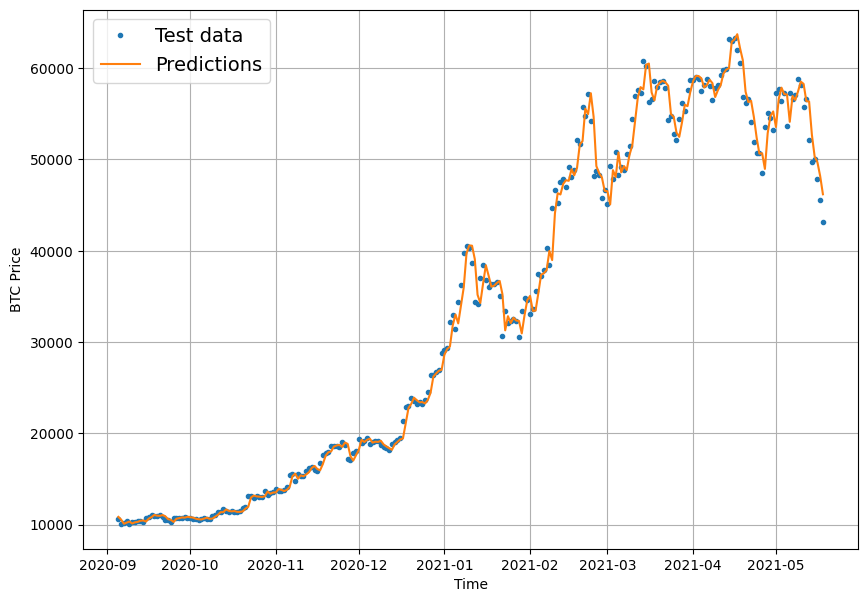

In [43]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [44]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [45]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [46]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1724.9532 - mae: 1724.9532 

18/18 [==============================] - 2s 38ms/step - loss: 1578.1648 - mae: 1578.1648 - val_loss: 3023.1355 - val_mae: 3023.1355
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 437.2692 - mae: 437.2692

18/18 [==============================] - 1s 31ms/step - loss: 434.8944 - mae: 434.8944 - val_loss: 2261.3611 - val_mae: 2261.3611
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 301.2112 - mae: 301.2112

18/18 [==============================] - 1s 30ms/step - loss: 271.0670 - mae: 271.0670 - val_loss: 1368.3657 - val_mae: 1368.3657
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 192.6306 - mae: 192.6306

18/18 [==============================] - 1s 32ms/step - loss: 213.6777 - mae: 213.6777 - val_loss: 1135.9987 - val_mae: 1135.9987
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 204.8806 - mae: 204.8806

18/18 [==============================] - 1s 32ms/step - loss: 204.8806 - mae: 204.8806 - val_loss: 1134.9502 - val_mae: 1134.9502
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 235.4616 - mae: 235.4616

18/18 [==============================] - 1s 31ms/step - loss: 199.2144 - mae: 199.2144 - val_loss: 1045.7256 - val_mae: 1045.7256
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 185.2430 - mae: 185.2430

18/18 [==============================] - 1s 30ms/step - loss: 183.4777 - mae: 183.4777 - val_loss: 1008.9276 - val_mae: 1008.9276
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 184.1654 - mae: 184.1654

18/18 [==============================] - 1s 32ms/step - loss: 174.1994 - mae: 174.1994 - val_loss: 985.1636 - val_mae: 985.1636
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 181.2974 - mae: 181.2974

18/18 [==============================] - 1s 45ms/step - loss: 172.1312 - mae: 172.1312 - val_loss: 961.8804 - val_mae: 961.8804
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 165.0000 - mae: 165.0000 - val_loss: 1193.4044 - val_mae: 1193.4044
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 188.9225 - mae: 188.9225

18/18 [==============================] - 1s 31ms/step - loss: 164.6273 - mae: 164.6273 - val_loss: 952.9158 - val_mae: 952.9158
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 130.7284 - mae: 130.7284

18/18 [==============================] - 1s 32ms/step - loss: 161.4564 - mae: 161.4564 - val_loss: 876.0471 - val_mae: 876.0471
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 157.4208 - mae: 157.4208 - val_loss: 934.7137 - val_mae: 934.7137
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 161.8425 - mae: 161.8425 - val_loss: 1022.5418 - val_mae: 1022.5418
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 161.5750 - mae: 161.5750

18/18 [==============================] - 1s 30ms/step - loss: 153.2081 - mae: 153.2081 - val_loss: 844.8174 - val_mae: 844.8174
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 150.9081 - mae: 150.9081

18/18 [==============================] - 1s 38ms/step - loss: 157.8833 - mae: 157.8833 - val_loss: 837.4727 - val_mae: 837.4727
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 151.0301 - mae: 151.0301 - val_loss: 1259.6646 - val_mae: 1259.6646
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 159.2551 - mae: 159.2551

18/18 [==============================] - 1s 42ms/step - loss: 159.1175 - mae: 159.1175 - val_loss: 790.1310 - val_mae: 790.1310
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 150.3457 - mae: 150.3457 - val_loss: 1520.4155 - val_mae: 1520.4155
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 182.1543 - mae: 182.1543 - val_loss: 830.9603 - val_mae: 830.9603
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 160.0831 - mae: 160.0831

18/18 [==============================] - 1s 43ms/step - loss: 157.7825 - mae: 157.7825 - val_loss: 770.8580 - val_mae: 770.8580
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 140.9535 - mae: 140.9535 - val_loss: 827.7443 - val_mae: 827.7443
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 145.7192 - mae: 145.7192 - val_loss: 895.8167 - val_mae: 895.8167
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 179.5327 - mae: 179.5327

18/18 [==============================] - 1s 30ms/step - loss: 140.4251 - mae: 140.4251 - val_loss: 766.9852 - val_mae: 766.9852
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 144.8946 - mae: 144.8946 - val_loss: 926.9584 - val_mae: 926.9584
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0758 - mae: 132.0758

18/18 [==============================] - 1s 30ms/step - loss: 139.3410 - mae: 139.3410 - val_loss: 719.6041 - val_mae: 719.6041
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 134.8106 - mae: 134.8106 - val_loss: 781.0500 - val_mae: 781.0500
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 140.3186 - mae: 140.3186 - val_loss: 863.5047 - val_mae: 863.5047
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1850 - mae: 138.1850 - val_loss: 980.0013 - val_mae: 980.0013
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 148.0813 - mae: 148.0813 - val_loss: 755.5208 - val_mae: 755.5208
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 130.9837 - mae: 130.9837

18/18 [==============================] - 1s 30ms/step - loss: 149.0089 - mae: 149.0089 - val_loss: 710.3870 - val_mae: 710.3870
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 130.7350 - mae: 130.7350 - val_loss: 737.8069 - val_mae: 737.8069
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 132.2382 - mae: 132.2382 - val_loss: 786.4243 - val_mae: 786.4242
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 151.9294 - mae: 151.9294

18/18 [==============================] - 1s 31ms/step - loss: 128.8417 - mae: 128.8417 - val_loss: 684.2526 - val_mae: 684.2526
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 122.4579 - mae: 122.4579

18/18 [==============================] - 1s 30ms/step - loss: 125.0026 - mae: 125.0026 - val_loss: 680.0253 - val_mae: 680.0253
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 141.0863 - mae: 141.0863 - val_loss: 925.4490 - val_mae: 925.4490
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 132.8141 - mae: 132.8141

18/18 [==============================] - 1s 29ms/step - loss: 138.7430 - mae: 138.7430 - val_loss: 675.5107 - val_mae: 675.5107
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 126.6979 - mae: 126.6979 - val_loss: 734.4670 - val_mae: 734.4670
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 133.5320 - mae: 133.5320 - val_loss: 1060.2885 - val_mae: 1060.2885
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 154.0097 - mae: 154.0097 - val_loss: 1240.9603 - val_mae: 1240.9603
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 144.3336 - mae: 144.3336 - val_loss: 893.9316 - val_mae: 893.9316
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 138.2743 - mae: 138.2743 - val_loss: 729.9134 - val_mae: 729.9134
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 132.6066 - mae: 132.6066 - val_loss: 839.5150 - val_mae: 839.5150
Epoch 44/100
 1/18 [>.......

18/18 [==============================] - 1s 29ms/step - loss: 151.1951 - mae: 151.1951 - val_loss: 662.5468 - val_mae: 662.5468
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 151.5182 - mae: 151.5182 - val_loss: 792.0024 - val_mae: 792.0024
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 133.0693 - mae: 133.0693 - val_loss: 675.4434 - val_mae: 675.4434
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2335 - mae: 123.2335 - val_loss: 679.6831 - val_mae: 679.6831
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 87.0617 - mae: 87.0617

18/18 [==============================] - 1s 30ms/step - loss: 122.0308 - mae: 122.0308 - val_loss: 662.1360 - val_mae: 662.1360
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0653 - mae: 124.0653 - val_loss: 728.6829 - val_mae: 728.6829
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 134.5650 - mae: 134.5650 - val_loss: 994.5510 - val_mae: 994.5510
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 141.7797 - mae: 141.7797 - val_loss: 808.1183 - val_mae: 808.1183
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 147.8468 - mae: 147.8468 - val_loss: 745.2559 - val_mae: 745.2559
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 131.1913 - mae: 131.1913 - val_loss: 784.1827 - val_mae: 784.1827
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 133.0784 - mae: 133.0784 - val_loss: 761.1476 - val_mae: 761.1476
Epoch 55/100
18/18 [============

18/18 [==============================] - 1s 37ms/step - loss: 132.1121 - mae: 132.1121 - val_loss: 640.1166 - val_mae: 640.1166
Epoch 59/100
10/18 [===============>..............] - ETA: 0s - loss: 148.0551 - mae: 148.0551

18/18 [==============================] - 2s 88ms/step - loss: 152.4287 - mae: 152.4287 - val_loss: 635.8580 - val_mae: 635.8580
Epoch 60/100
13/18 [====================>.........] - ETA: 0s - loss: 112.5860 - mae: 112.5860

18/18 [==============================] - 1s 36ms/step - loss: 118.7724 - mae: 118.7724 - val_loss: 633.7859 - val_mae: 633.7859
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 123.5653 - mae: 123.5653 - val_loss: 650.0106 - val_mae: 650.0106
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 121.5805 - mae: 121.5805 - val_loss: 770.3870 - val_mae: 770.3870
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 121.6918 - mae: 121.6918 - val_loss: 642.3113 - val_mae: 642.3113
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3390 - mae: 114.3390 - val_loss: 662.3253 - val_mae: 662.3253
Epoch 65/100
14/18 [======================>.......] - ETA: 0s - loss: 121.1213 - mae: 121.1213

18/18 [==============================] - 1s 44ms/step - loss: 119.7127 - mae: 119.7127 - val_loss: 630.9410 - val_mae: 630.9410
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9975 - mae: 115.9975 - val_loss: 641.7429 - val_mae: 641.7429
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 118.1450 - mae: 118.1450 - val_loss: 666.2395 - val_mae: 666.2395
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 116.1729 - mae: 116.1729 - val_loss: 845.8121 - val_mae: 845.8121
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 119.0423 - mae: 119.0423 - val_loss: 677.5944 - val_mae: 677.5944
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1783 - mae: 121.1783 - val_loss: 1002.2622 - val_mae: 1002.2622
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 130.2437 - mae: 130.2437 - val_loss: 648.7779 - val_mae: 648.7779
Epoch 72/100
18/18 [==========

18/18 [==============================] - 1s 30ms/step - loss: 128.4451 - mae: 128.4451 - val_loss: 627.1723 - val_mae: 627.1723
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 126.0593 - mae: 126.0593 - val_loss: 1055.2856 - val_mae: 1055.2856
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 138.9064 - mae: 138.9064 - val_loss: 1054.2933 - val_mae: 1054.2933
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 134.7153 - mae: 134.7153 - val_loss: 819.9012 - val_mae: 819.9012
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 126.3353 - mae: 126.3353 - val_loss: 674.9360 - val_mae: 674.9360
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 129.4667 - mae: 129.4667 - val_loss: 630.8802 - val_mae: 630.8802
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 139.4989 - mae: 139.4989 - val_loss: 948.9539 - val_mae: 948.9539
Epoch 94/100
17/18 [========

18/18 [==============================] - 1s 29ms/step - loss: 157.4890 - mae: 157.4890 - val_loss: 608.1371 - val_mae: 608.1371
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 114.5523 - mae: 114.5523

18/18 [==============================] - 1s 29ms/step - loss: 117.6978 - mae: 117.6978 - val_loss: 607.0311 - val_mae: 607.0311
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4477 - mae: 113.4477 - val_loss: 613.4076 - val_mae: 613.4076
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 120.0030 - mae: 120.0030 - val_loss: 835.7209 - val_mae: 835.7209
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 135.5997 - mae: 135.5997 - val_loss: 729.5979 - val_mae: 729.5979
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 132.4646 - mae: 132.4646 - val_loss: 732.3192 - val_mae: 732.3192
Epoch 100/100
 1/18 [>.............................] - ETA: 0s - loss: 140.7865 - mae: 140.7865

18/18 [==============================] - 1s 30ms/step - loss: 124.1306 - mae: 124.1306 - val_loss: 604.5095 - val_mae: 604.5095


In [47]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 604.5095 - mae: 604.5095


[604.509521484375, 604.509521484375]

In [48]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 604.5095,
 'mse': 1247558.4,
 'rmse': 1116.9415,
 'mape': 2.7054126,
 'mase': 1.0566885}

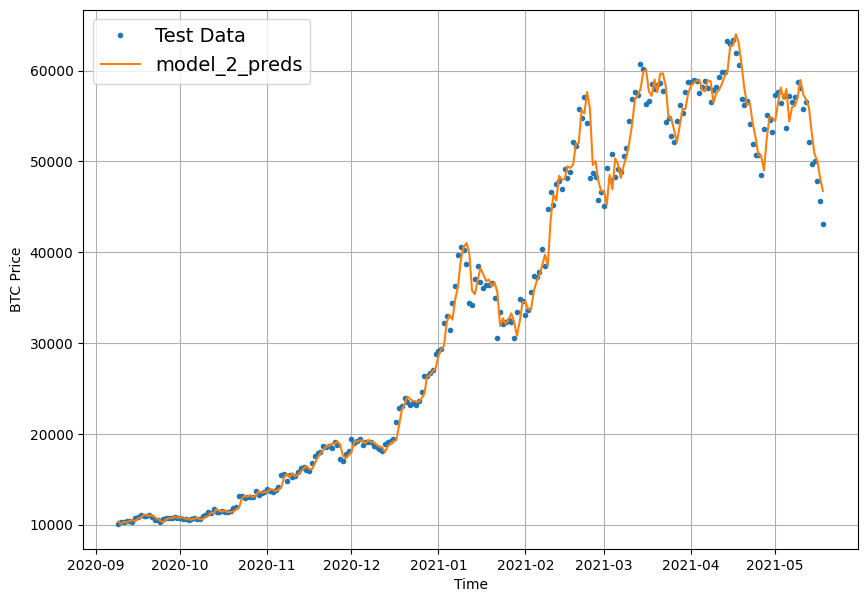

In [50]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [51]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [52]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [53]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 3161.9219 - mae: 3161.9219

18/18 [==============================] - 2s 39ms/step - loss: 1336.0249 - mae: 1336.0249 - val_loss: 2974.1536 - val_mae: 2974.1536
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 505.2695 - mae: 505.2695

18/18 [==============================] - 1s 43ms/step - loss: 476.5786 - mae: 476.5786 - val_loss: 2167.8020 - val_mae: 2167.8020
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 379.7128 - mae: 379.7128

18/18 [==============================] - 1s 44ms/step - loss: 376.0035 - mae: 376.0035 - val_loss: 2044.8385 - val_mae: 2044.8385
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 345.5228 - mae: 345.5228

18/18 [==============================] - 1s 43ms/step - loss: 346.3943 - mae: 346.3943 - val_loss: 1829.0175 - val_mae: 1829.0175
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 328.4244 - mae: 328.4244 - val_loss: 1955.8026 - val_mae: 1955.8026
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 321.7695 - mae: 321.7695

18/18 [==============================] - 1s 31ms/step - loss: 317.5526 - mae: 317.5526 - val_loss: 1718.2656 - val_mae: 1718.2656
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 277.3896 - mae: 277.3896

18/18 [==============================] - 1s 30ms/step - loss: 301.8951 - mae: 301.8951 - val_loss: 1566.3083 - val_mae: 1566.3083
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 299.0399 - mae: 299.0399 - val_loss: 1605.9968 - val_mae: 1605.9968
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 289.4770 - mae: 289.4770 - val_loss: 1710.5446 - val_mae: 1710.5446
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 295.8745 - mae: 295.8745 - val_loss: 1587.7714 - val_mae: 1587.7714
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 298.1507 - mae: 298.1507

18/18 [==============================] - 1s 47ms/step - loss: 284.8121 - mae: 284.8121 - val_loss: 1501.0671 - val_mae: 1501.0671
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 272.8920 - mae: 272.8920 - val_loss: 1599.6055 - val_mae: 1599.6055
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 241.1672 - mae: 241.1672

18/18 [==============================] - 1s 31ms/step - loss: 269.8569 - mae: 269.8569 - val_loss: 1460.4083 - val_mae: 1460.4083
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 252.8202 - mae: 252.8202

18/18 [==============================] - 1s 30ms/step - loss: 268.0334 - mae: 268.0334 - val_loss: 1442.5938 - val_mae: 1442.5938
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 263.6866 - mae: 263.6866 - val_loss: 1540.7692 - val_mae: 1540.7692
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 259.3918 - mae: 259.3918 - val_loss: 1467.6018 - val_mae: 1467.6018
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 257.3809 - mae: 257.3809 - val_loss: 1588.0612 - val_mae: 1588.0612
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 258.8125 - mae: 258.8125 - val_loss: 1671.8434 - val_mae: 1671.8434
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 257.8657 - mae: 257.8657 - val_loss: 1599.0107 - val_mae: 1599.0107
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 258.3000 - mae: 258.3000 - val_loss: 1475.2300 - val_mae: 1475.2300
Epoch 21/100
 1/18

18/18 [==============================] - 1s 30ms/step - loss: 251.5590 - mae: 251.5590 - val_loss: 1418.2826 - val_mae: 1418.2826
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 319.4008 - mae: 319.4008

18/18 [==============================] - 1s 29ms/step - loss: 251.9088 - mae: 251.9088 - val_loss: 1414.0233 - val_mae: 1414.0233
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 283.0765 - mae: 283.0765

18/18 [==============================] - 0s 28ms/step - loss: 252.7496 - mae: 252.7496 - val_loss: 1358.4127 - val_mae: 1358.4127
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 263.3402 - mae: 263.3402 - val_loss: 1392.8348 - val_mae: 1392.8348
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 252.9257 - mae: 252.9257 - val_loss: 1509.5544 - val_mae: 1509.5544
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 247.5811 - mae: 247.5811 - val_loss: 1412.5054 - val_mae: 1412.5054
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 242.6188 - mae: 242.6188 - val_loss: 1415.8245 - val_mae: 1415.8245
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 241.4411 - mae: 241.4411 - val_loss: 1393.6210 - val_mae: 1393.6210
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 241.6348 - mae: 241.6348 - val_loss: 1401.3019 - val_mae: 1401.3019
Epoch 30/100
18/18

18/18 [==============================] - 0s 29ms/step - loss: 238.6188 - mae: 238.6188 - val_loss: 1337.9899 - val_mae: 1337.9899
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 240.5226 - mae: 240.5226 - val_loss: 1347.9744 - val_mae: 1347.9744
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 241.1060 - mae: 241.1060 - val_loss: 1361.6665 - val_mae: 1361.6665
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 240.5250 - mae: 240.5250 - val_loss: 1349.8831 - val_mae: 1349.8831
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 239.7672 - mae: 239.7672 - val_loss: 1378.1105 - val_mae: 1378.1105
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 239.1043 - mae: 239.1043 - val_loss: 1384.8348 - val_mae: 1384.8348
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 251.4573 - mae: 251.4573

18/18 [==============================] - 1s 30ms/step - loss: 253.2416 - mae: 253.2416 - val_loss: 1333.9457 - val_mae: 1333.9457
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 243.6235 - mae: 243.6235 - val_loss: 1390.5063 - val_mae: 1390.5063
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 237.8174 - mae: 237.8174 - val_loss: 1359.4327 - val_mae: 1359.4327
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 234.0869 - mae: 234.0869 - val_loss: 1519.7872 - val_mae: 1519.7872
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 237.8082 - mae: 237.8082 - val_loss: 1485.9175 - val_mae: 1485.9175
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 242.6640 - mae: 242.6640 - val_loss: 1373.7653 - val_mae: 1373.7653
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 232.9895 - mae: 232.9895

18/18 [==============================] - 1s 30ms/step - loss: 232.9895 - mae: 232.9895 - val_loss: 1301.1962 - val_mae: 1301.1962
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 237.6614 - mae: 237.6614 - val_loss: 1313.2137 - val_mae: 1313.2137
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 232.1406 - mae: 232.1406 - val_loss: 1432.4070 - val_mae: 1432.4070
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 237.8622 - mae: 237.8622 - val_loss: 1345.5229 - val_mae: 1345.5229
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 235.3282 - mae: 235.3282 - val_loss: 1395.8030 - val_mae: 1395.8030
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 235.6535 - mae: 235.6535

18/18 [==============================] - 1s 30ms/step - loss: 235.6535 - mae: 235.6535 - val_loss: 1290.8259 - val_mae: 1290.8259
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 246.2824 - mae: 246.2824 - val_loss: 1442.9885 - val_mae: 1442.9885
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 238.8926 - mae: 238.8926 - val_loss: 1335.0945 - val_mae: 1335.0945
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 231.1658 - mae: 231.1658 - val_loss: 1495.4648 - val_mae: 1495.4648
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 234.1650 - mae: 234.1650 - val_loss: 1306.2664 - val_mae: 1306.2664
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 230.2114 - mae: 230.2114

18/18 [==============================] - 1s 40ms/step - loss: 230.2114 - mae: 230.2114 - val_loss: 1269.0569 - val_mae: 1269.0569
Epoch 54/100
14/18 [======================>.......] - ETA: 0s - loss: 230.6961 - mae: 230.6961

18/18 [==============================] - 1s 43ms/step - loss: 229.3285 - mae: 229.3285 - val_loss: 1267.7627 - val_mae: 1267.7627
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 228.6119 - mae: 228.6119 - val_loss: 1292.5438 - val_mae: 1292.5438
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 227.1416 - mae: 227.1416 - val_loss: 1363.5286 - val_mae: 1363.5286
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 234.9614 - mae: 234.9614 - val_loss: 1338.3380 - val_mae: 1338.3380
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 229.4293 - mae: 229.4293

18/18 [==============================] - 1s 42ms/step - loss: 232.0337 - mae: 232.0337 - val_loss: 1258.8607 - val_mae: 1258.8607
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 230.6590 - mae: 230.6590 - val_loss: 1265.1443 - val_mae: 1265.1443
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 232.1380 - mae: 232.1380 - val_loss: 1285.1018 - val_mae: 1285.1018
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 226.4611 - mae: 226.4611 - val_loss: 1345.1622 - val_mae: 1345.1622
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 231.2421 - mae: 231.2421 - val_loss: 1269.3372 - val_mae: 1269.3372
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 229.9039 - mae: 229.9039 - val_loss: 1370.4073 - val_mae: 1370.4073
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 227.9620 - mae: 227.9620 - val_loss: 1271.6144 - val_mae: 1271.6144
Epoch 65/100
18/18

18/18 [==============================] - 1s 31ms/step - loss: 226.7846 - mae: 226.7846 - val_loss: 1254.6691 - val_mae: 1254.6691
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 270.3006 - mae: 270.3006

18/18 [==============================] - 1s 29ms/step - loss: 226.0978 - mae: 226.0978 - val_loss: 1247.1855 - val_mae: 1247.1855
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 221.5819 - mae: 221.5819 - val_loss: 1266.5273 - val_mae: 1266.5273
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 222.7751 - mae: 222.7751 - val_loss: 1300.8414 - val_mae: 1300.8414
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 223.2806 - mae: 223.2806 - val_loss: 1430.3325 - val_mae: 1430.3325
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 226.7714 - mae: 226.7714 - val_loss: 1264.8646 - val_mae: 1264.8646
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 228.2209 - mae: 228.2209 - val_loss: 1262.3181 - val_mae: 1262.3181
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 226.3266 - mae: 226.3266 - val_loss: 1306.4453 - val_mae: 1306.4453
Epoch 79/100
18/18

18/18 [==============================] - 1s 30ms/step - loss: 224.4867 - mae: 224.4867 - val_loss: 1242.7141 - val_mae: 1242.7141
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 223.2801 - mae: 223.2801 - val_loss: 1284.8787 - val_mae: 1284.8787
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 223.1339 - mae: 223.1339 - val_loss: 1301.0790 - val_mae: 1301.0790
Epoch 84/100
17/18 [===========================>..] - ETA: 0s - loss: 220.9397 - mae: 220.9397

18/18 [==============================] - 1s 29ms/step - loss: 220.5801 - mae: 220.5801 - val_loss: 1236.5321 - val_mae: 1236.5321
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 222.9888 - mae: 222.9888 - val_loss: 1279.1720 - val_mae: 1279.1720
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 219.9724 - mae: 219.9724 - val_loss: 1300.4521 - val_mae: 1300.4521
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 227.3569 - mae: 227.3569 - val_loss: 1365.1294 - val_mae: 1365.1294
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 226.6141 - mae: 226.6141 - val_loss: 1516.9575 - val_mae: 1516.9575
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 230.3943 - mae: 230.3943 - val_loss: 1282.0574 - val_mae: 1282.0574
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 224.5043 - mae: 224.5043 - val_loss: 1380.7487 - val_mae: 1380.7487
Epoch 91/100
18/18

18/18 [==============================] - 1s 51ms/step - loss: 225.4753 - mae: 225.4753 - val_loss: 1235.7538 - val_mae: 1235.7538
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 219.9234 - mae: 219.9234 - val_loss: 1323.2061 - val_mae: 1323.2061


In [54]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1235.7538 - mae: 1235.7538


[1235.7537841796875, 1235.7537841796875]

In [55]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [56]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [57]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([  635.7642  ,   368.57477 ,   333.49847 ,   483.20242 ,
          406.09402 ,   404.7823  ,   486.12766 ,   489.39166 ,
          442.05328 ,   593.4678  ,   845.30725 ,   737.5773  ,
          815.0976  ,   859.61395 ,   518.2342  ,   268.20514 ,
          244.77295 ,   290.81186 ,   242.25279 ,   250.51451 ,
          261.2124  ,   173.53773 ,   404.8022  ,   336.78745 ,
          236.00662 ,    91.131836,   122.887276,   128.01736 ,
          165.3734  ,   158.24861 ,   290.569   ,   393.9445  ,
          377.80463 ,   345.6308  ,   267.29688 ,   282.2029  ,
          261.45856 ,   216.16135 ,   237.79338 ,   264.35074 ,
          517.0511  ,   130.05699 ,    85.67836 ,    76.5874  ,
          109.857   ,   138.18275 ,    96.64955 ,    67.6619  ,
           85.944405,    81.26716 ,   105.23026 ,   160.42879 ,
          184.22551 ,   168.11824 ,   282.36356 ,   395.4982  ,
          532.8757  ,   490.74637 ,   509.84213 ,   570.831   ,
          327.1633  ,   220.51207

# Make our evaluation function work for larger horizons

In [58]:
model_2_results["mae"].ndim

0

In [59]:
model_3_results["mae"].ndim

1

In [60]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1235.7538 - mae: 1235.7538


[1235.7537841796875, 1235.7537841796875]

In [61]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1235.7537

In [62]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [63]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1235.7537,
 'mse': 5344176.5,
 'rmse': 1424.9368,
 'mape': 5.5323625,
 'mase': 2.1989546}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [64]:
test_labels.shape

(551, 7)

In [65]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9428.979 ,  9110.812 ,  8967.2295,  9109.797 ,  8960.442 ,
        8867.358 ,  8852.321 ,  8706.409 ,  8482.138 ,  8464.299 ,
        8505.183 ,  8255.46  ,  8193.35  ,  8159.1006,  7785.9297,
        7436.2554,  7370.9556,  7167.7104,  7216.263 ,  7208.907 ,
        7515.0435,  7484.4165,  7790.145 ,  7720.686 ,  7636.915 ,
        7448.6123,  7475.429 ,  7266.8335,  7431.579 ,  7473.193 ,
        7553.046 ,  7593.9204,  7513.552 ,  7387.7017,  7285.379 ,
        7339.723 ,  7289.2354,  7248.5103,  7200.3125,  7023.1953,
        6716.7544,  7208.3203,  7208.348 ,  7210.763 ,  7292.837 ,
        7376.6   ,  7230.8076,  7306.2515,  7305.112 ,  7228.3267,
        7208.53  ,  7385.5415,  7393.519 ,  7354.9453,  7348.4536,
        7231.1436,  7125.133 ,  7281.0103,  7379.2603,  7421.3877,
        7722.6416,  8025.434 ,  8137.4756,  8042.8022,  8168.8125,
        8174.435 ,  8266.315 ,  8263.54  ,  8695.473 ,  8892.231 ,
        8967.6

In [66]:
model_3_preds.shape

(551, 7)

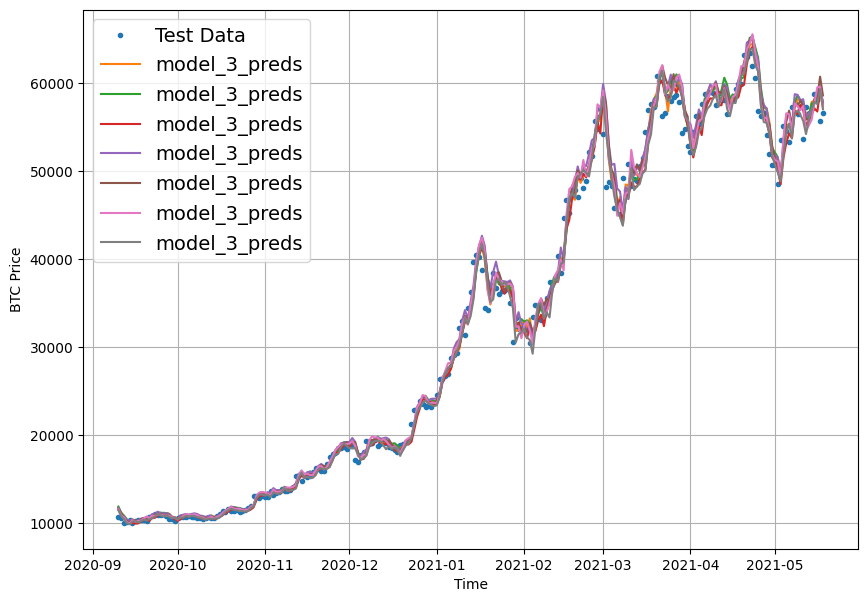

In [67]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

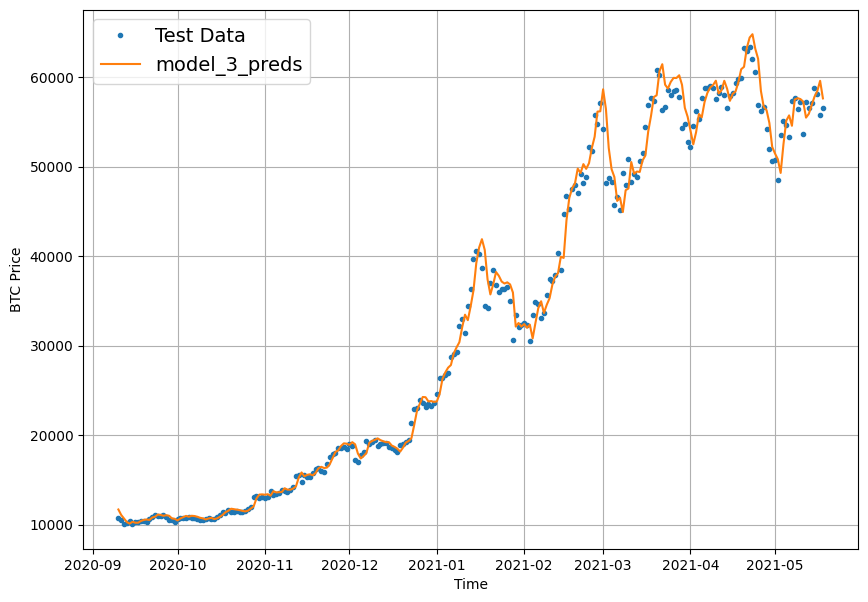

In [68]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

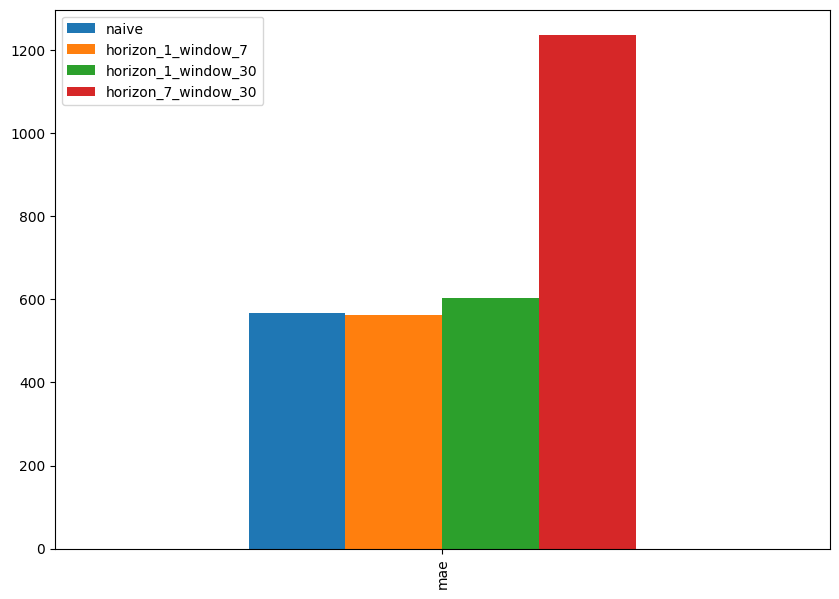

In [69]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [70]:
HORIZON = 1 # We will predict 1 number
WINDOW_SIZE = 7 # We will use 7 elements for training

In [71]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)


(2780, 2780)

In [72]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows ,full_labels )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# To use the Conv1D layer , we need an input shape of : (batch_size , timesteps , input_dim).

However our data isnt in that shape yet.

In [73]:
# Check data input shape
train_windows[0].shape  # (WINDOW_SIZE , )

(7,)

In [74]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works.
example = tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [75]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) # Add extra dimension for input_dim
# lambda x: tf.expand_dims(x, axis=1): Bu Lambda katmanı bir işlevi tanımlar. İşlev, bir giriş tensörünü (x) alır ve bu tensörü işler. İşlev, giriş tensörünü bir boyut eklemek için tf.expand_dims fonksiyonunu kullanır. Bu işlev, giriş tensörünün her bir öğesini (örneğin bir veri noktasını) işler ve bu öğelerin her birini önceki boyutları koruyarak belirtilen eksen (axis=1) boyunca yeni bir boyut ekler.
# layers.Lambda: Bu, Keras'ın katmanlarını tanımlamak için kullanılan bir sınıftır. Lambda katmanı, özel bir işlevi (fonksiyonu) uygulamak için kullanılır. Bu işlev, katmanın giriş verilerini dönüştürmek veya manipüle etmek için kullanılır.

# Direkt tf.expand_dims kullanmayıp lambda layer kullanmamızın sebebi lambda layerı modelimize direkt ekleyebilecek olmamız

In [76]:
# Test out our lambda layer
print(f"Original shape : {example.shape} ")  # ( WINDOW_SIZE , )
print(f"Expanded shape : { expand_dims_layer(example).shape }")  # ( WINDOW_SIZE , input_dim )

Original shape : (7,) 
Expanded shape : (7, 1)


### NOTE: kernel_size defines the size of the sliding window.

The filters parameters is just how many different windows you will have (All of them with the same length , which is kernel_size) . How many different results or channels you want to produce.

When you use filters = 100 and kernel_size = 4 , you are creating 100 different filters , each of them with length 4. The result will bring 100 different convolutions.

### NOTE: Conv1D katmanları, girdi sıralı verileri üzerinde kaydırma işlemleri gerçekleştirir ve bu verilerdeki özellikleri çıkarır. Ardışık Conv1D katmanlarını bir araya getirerek daha karmaşık özellikleri yakalayabilirsiniz. Ancak sıralı verilerde tipik olarak Conv1D katmanları arasına pooling katmanları eklemeye gerek yoktur, çünkü Conv1D katmanları zaten sıralı verilerdeki özellikleri öğrenmek için yeterince yeteneklidir.

In [77]:
# Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(
    [
        #expand_dims_layer ,  direkt bunu kullanabiliriz practice amaçlı baştan yazıcaz
        layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) ,
        layers.Conv1D(filters = 128 , activation = "relu" , kernel_size = 5 , padding = "causal" ) , # kernel_size = 5 dedigimizde strides = 1 oldugu icin default olarak windowun icine girip ilk 5 ine bakıyor sonrasında ilk elementi atlayıp sonraki 5 ine bakıyor böyle devam ediyor.
        # padding = causal olmasının sebebi causal olunca "model shouldnt violate the temporal order " bizim datamızda da temporal bir yapı oldugu icin casual kullanıyoruz.
        layers.Dense(HORIZON)
    ]  , name = "model_4_conv1d"
)
# Compile a model
model_4.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_4.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1913.6672

18/18 [==============================] - 3s 57ms/step - loss: 1913.6672 - val_loss: 3058.2585
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 317.7234

18/18 [==============================] - 1s 40ms/step - loss: 303.5422 - val_loss: 1130.8975
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 145.8906

18/18 [==============================] - 1s 38ms/step - loss: 202.9849 - val_loss: 992.8782
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 179.8559

18/18 [==============================] - 1s 40ms/step - loss: 179.8559 - val_loss: 985.1293
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 176.3372 - val_loss: 992.9678
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 175.9233

18/18 [==============================] - 1s 47ms/step - loss: 175.9233 - val_loss: 984.5106
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 181.5060

18/18 [==============================] - 1s 58ms/step - loss: 176.3231 - val_loss: 956.1100
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 171.1964

18/18 [==============================] - 1s 56ms/step - loss: 169.6790 - val_loss: 950.7921
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 167.4726 - val_loss: 980.3046
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 184.4649

18/18 [==============================] - 1s 41ms/step - loss: 164.9650 - val_loss: 913.2565
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 162.4700

18/18 [==============================] - 1s 61ms/step - loss: 162.4700 - val_loss: 898.1651
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 160.2390 - val_loss: 949.0612
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 157.9553

18/18 [==============================] - 1s 42ms/step - loss: 157.9553 - val_loss: 891.0662
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 151.6871

18/18 [==============================] - 1s 43ms/step - loss: 154.5900 - val_loss: 881.0591
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 156.1690 - val_loss: 885.9312
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 149.5620

18/18 [==============================] - 1s 40ms/step - loss: 149.5620 - val_loss: 841.2197
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 147.6284 - val_loss: 843.5809
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 145.0612 - val_loss: 854.9893
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 142.2964

18/18 [==============================] - 1s 40ms/step - loss: 142.2964 - val_loss: 813.9765
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 141.0394

18/18 [==============================] - 1s 41ms/step - loss: 141.3501 - val_loss: 794.3713
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 140.5320

18/18 [==============================] - 1s 40ms/step - loss: 140.5320 - val_loss: 766.5488
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 137.3982 - val_loss: 773.1310
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 134.2720 - val_loss: 766.8688
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 135.9103

18/18 [==============================] - 1s 41ms/step - loss: 134.3046 - val_loss: 761.4080
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 131.6420

18/18 [==============================] - 1s 40ms/step - loss: 131.1258 - val_loss: 728.7354
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 129.5939

18/18 [==============================] - 1s 40ms/step - loss: 129.8642 - val_loss: 712.1609
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 128.3891

18/18 [==============================] - 1s 41ms/step - loss: 128.3891 - val_loss: 706.0712
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 123.8505

18/18 [==============================] - 1s 50ms/step - loss: 126.0346 - val_loss: 702.4741
Epoch 29/100
11/18 [=================>............] - ETA: 0s - loss: 126.1223

18/18 [==============================] - 1s 85ms/step - loss: 124.8485 - val_loss: 698.8292
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 127.8469 - val_loss: 833.3689
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 136.5620 - val_loss: 764.0640
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 130.3223

18/18 [==============================] - 1s 41ms/step - loss: 129.7976 - val_loss: 671.4398
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 126.1388

18/18 [==============================] - 1s 41ms/step - loss: 126.1388 - val_loss: 659.9727
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 120.7949

18/18 [==============================] - 1s 40ms/step - loss: 120.7949 - val_loss: 654.7353
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1995 - val_loss: 657.7039
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 122.8713 - val_loss: 749.1038
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 120.0620

18/18 [==============================] - 1s 41ms/step - loss: 120.9001 - val_loss: 648.0610
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 117.4471

18/18 [==============================] - 1s 41ms/step - loss: 117.2780 - val_loss: 634.0677
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7243 - val_loss: 695.3958
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 117.1318

18/18 [==============================] - 1s 41ms/step - loss: 117.1318 - val_loss: 628.2776
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3654 - val_loss: 632.1934
Epoch 42/100
16/18 [=========================>....] - ETA: 0s - loss: 118.6341

18/18 [==============================] - 1s 41ms/step - loss: 119.3267 - val_loss: 625.9991
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6005 - val_loss: 631.0120
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0751 - val_loss: 664.4810
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 115.1660

18/18 [==============================] - 1s 41ms/step - loss: 117.0188 - val_loss: 623.0618
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 114.5472

18/18 [==============================] - 1s 40ms/step - loss: 115.0508 - val_loss: 610.6226
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7962 - val_loss: 683.9403
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3251 - val_loss: 669.4102
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 116.8239

18/18 [==============================] - 1s 41ms/step - loss: 116.8239 - val_loss: 609.3875
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9815 - val_loss: 611.7098
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9303 - val_loss: 621.4830
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 123.1380

18/18 [==============================] - 1s 40ms/step - loss: 117.2728 - val_loss: 605.0132
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7641 - val_loss: 625.1561
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8916 - val_loss: 676.8600
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 114.8054

18/18 [==============================] - 1s 64ms/step - loss: 114.8054 - val_loss: 595.5114
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 112.4433 - val_loss: 740.8475
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 130.0571 - val_loss: 632.8581
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 117.9707 - val_loss: 627.9386
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 108.4982

18/18 [==============================] - 1s 60ms/step - loss: 110.9596 - val_loss: 595.2365
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 110.8317 - val_loss: 608.2557
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2809 - val_loss: 600.8171
Epoch 62/100
13/18 [====================>.........] - ETA: 0s - loss: 110.8153

18/18 [==============================] - 1s 47ms/step - loss: 110.6855 - val_loss: 595.0523
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1719

18/18 [==============================] - 1s 39ms/step - loss: 112.6459 - val_loss: 588.4631
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3972 - val_loss: 646.6902
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4021 - val_loss: 605.1631
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2890 - val_loss: 596.1969
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2153 - val_loss: 680.5789
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8895 - val_loss: 700.3109
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2377 - val_loss: 659.0217
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0082 - val_loss: 588.4673
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1772 - val_loss: 611.5656
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 11

18/18 [==============================] - 1s 41ms/step - loss: 111.9059 - val_loss: 582.7347
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3701 - val_loss: 585.4452
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3430 - val_loss: 603.5627
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7379 - val_loss: 584.7328
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 110.5696

18/18 [==============================] - 1s 40ms/step - loss: 109.7123 - val_loss: 579.8333
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3071 - val_loss: 579.8634
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9071 - val_loss: 612.6350
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3096 - val_loss: 580.9760
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8484 - val_loss: 595.9711
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2207 - val_loss: 592.8201
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6342 - val_loss: 642.8385
Epoch 84/100
17/18 [===========================>..] - ETA: 0s - loss: 112.9665

18/18 [==============================] - 1s 40ms/step - loss: 112.4613 - val_loss: 576.8799
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2818 - val_loss: 588.0980
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3819 - val_loss: 643.9550
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4674 - val_loss: 594.0310
Epoch 88/100
18/18 [==============================] - ETA: 0s - loss: 109.1289

18/18 [==============================] - 1s 40ms/step - loss: 109.1289 - val_loss: 575.0735
Epoch 89/100
17/18 [===========================>..] - ETA: 0s - loss: 110.7386

18/18 [==============================] - 1s 39ms/step - loss: 112.1415 - val_loss: 573.8285
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2396 - val_loss: 627.6665
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 112.1081 - val_loss: 590.2639
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8904 - val_loss: 582.3349
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2618 - val_loss: 617.4587
Epoch 94/100
16/18 [=========================>....] - ETA: 0s - loss: 111.0910

18/18 [==============================] - 1s 42ms/step - loss: 109.6790 - val_loss: 573.5877
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6827 - val_loss: 590.9907
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5040 - val_loss: 594.8253
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4575 - val_loss: 593.0164
Epoch 98/100
18/18 [==============================] - ETA: 0s - loss: 108.7827

18/18 [==============================] - 1s 40ms/step - loss: 108.7827 - val_loss: 573.3062
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7703 - val_loss: 573.6807
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9395 - val_loss: 589.3384


In [78]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Evaluate our model
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 589.3386


589.3385620117188

In [80]:
# Load back in the best performing Conv1D model and re-evaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.3062


573.30615234375

In [81]:
test_windows.shape , test_labels.shape

((556, 7), (556, 1))

In [82]:
model_4_preds = model_4.predict(test_windows)
test_labels.shape , tf.squeeze(model_4_preds).shape

18/18 [==============================] - 0s 4ms/step


((556, 1), TensorShape([556]))

In [83]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 573.30615,
 'mse': 1187039.1,
 'rmse': 1089.5132,
 'mape': 2.5612562,
 'mase': 1.0071402}

# Model 5: RNN (With LSTM)

We will use the same data we created previously.

In [84]:
tf.random.set_seed(42)
# Lets build a LSTM model with the Functional API
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)  # Because LSTM layers should take input with shape : A 3D tensor with shape [batch, timesteps, feature].
#x = layers.LSTM(128 , return_sequences = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)  # Default hyperparameterlarla modelimiz çok kötü mae verdi bu yüzden tuning yapacağız.
#x = layers.Dense(32 , activation = "relu")(x)  Bunlarla beraber denedik modelimiz yine improve olmadı
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs , outputs , name = "model_5_lstm")


In [85]:
# Compile a model
model_5.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_5.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 117ms/step - loss: 2496.4026 - val_loss: 9398.8125
Epoch 2/100
18/18 [==============================] - 2s 107ms/step - loss: 598.2390 - val_loss: 2049.0464
Epoch 3/100
18/18 [==============================] - 2s 102ms/step - loss: 251.3069 - val_loss: 1393.3528
Epoch 4/100
18/18 [==============================] - 2s 123ms/step - loss: 191.9580 - val_loss: 1078.7197
Epoch 5/100
18/18 [==============================] - 2s 118ms/step - loss: 186.6603 - val_loss: 1049.1406
Epoch 6/100
18/18 [==============================] - 2s 127ms/step - loss: 184.3450 - val_loss: 1024.9677
Epoch 7/100
18/18 [==============================] - 2s 101ms/step - loss: 186.8482 - val_loss: 1015.1708
Epoch 8/100
18/18 [==============================] - 2s 101ms/step - loss: 181.5074 - val_loss: 1013.2392
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 179.5900 - val_loss: 1014.9515
Epoch 10/100
18/18 [===========================

In [86]:
# Load in best version of model_5 and evaluate it
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 582.1146


582.1145629882812

In [87]:
model_5_preds = model_5.predict(test_windows)
model_5_preds.shape

18/18 [==============================] - 0s 2ms/step


(556, 1)

In [88]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_5_preds))
model_5_results

{'mae': 582.11444,
 'mse': 1217514.2,
 'rmse': 1103.4103,
 'mape': 2.6179965,
 'mase': 1.0226139}

### Because neural networks are such powerful algorihtms , they can be used for almost any problem , however , that doesnt mean they will achieve performant or usable results.

# Make a multivariate time series dataset

Before we add a feature to our time series data , what is a feature we can use?

Bizim şu anki datamız open system bir data yani bunun grafiğini her şey değiştirebilir. Bu yüzden biz buna dışarıdan her türlü feature ekleyebiliriz.

One feature we could add is whether or not Elong Trust tweeted on that day.
* day 1 - 0 (this number is  how many tweeted on this day)
* day 2 - 1
* day 3 - 0

What is a better feature to use?

How about the bitcoin halving events?(miningte kazdıgın her blok icin verilen bitcoin ödülünü yarıya düşürme eventi)(daha az , daha değerli olduğu için bu event olduktan sonra bitcoinin değeri artıyor.)

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [89]:
# Lets make a multivariate time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [90]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [91]:
# Lets add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward wont be in our dataset (our dataset starts from 01 October 2013 )
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates (we should add these values as our data's dates type like 2013-10-04)
block_reward_2_datetime = np.datetime64("2012-11-28")  # Sondaki 64 dtype ı belirtiyor.
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

# Bizim bi range oluşturmamız gerek bu tarihlerle. mesela block_reward_2_datetime ile block_reward_3_datetime arasındaki tarihlerde rewardımız 25 olacak. Kalanları da aynı bu şekilde ayarlayacağız.

In [92]:
 bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [93]:
 bitcoin_prices.index[ -1 : ]

DatetimeIndex(['2021-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [94]:
# Create date ranges of where spesific block_reward values should be
block_reward_2_days =  (block_reward_3_datetime - bitcoin_prices.index[0]).days # Because we set up our block_reward_2_datetime object as np.datetime , we can use this with the indexes on our Bitcoin prices DataFrame. bitcoin_prices.index[0] bizim datamızdaki ilk tarihi verecek. Datamızdaki ilk tarihten itibaren alıyoruz çünkü bizim datamızda 2012 verileri yok. İki datetime ı birbirinden çıakrdığımız için .days attribute kullanabiliyoruz.
block_reward_2_days

1012

In [95]:
block_reward_3_days = ( block_reward_4_datetime - bitcoin_prices.index[0] ).days
block_reward_2_days , block_reward_3_days
# ilk günden 1012. güne kadar  reward 25 , 1012. günden 2041. güne kadar reward 12 , 2421 den sonraki günler için reward 6.25 olacak

(1012, 2421)

In [96]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()  # bitcoin_prices dataframe imizin aynısını kopyaladık.
bitcoin_prices_block["block_reward"] = None    # block_reward columnu ekledik en başta boş olarak ekliyoruz sonrasında dolduruyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [97]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[ : block_reward_2_days , -1] = block_reward_2  # Index eklemek istediğimiz icin iloc kullanıyoruz. Son columnda block_rewardlarımız oldugu icin ve biz bunları doldurmak istedigimiz icin column kısmına -1 diyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [98]:
bitcoin_prices_block.iloc[ block_reward_2_days : block_reward_3_days , -1 ] = block_reward_3
bitcoin_prices_block.iloc[ block_reward_3_days :  , -1 ] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

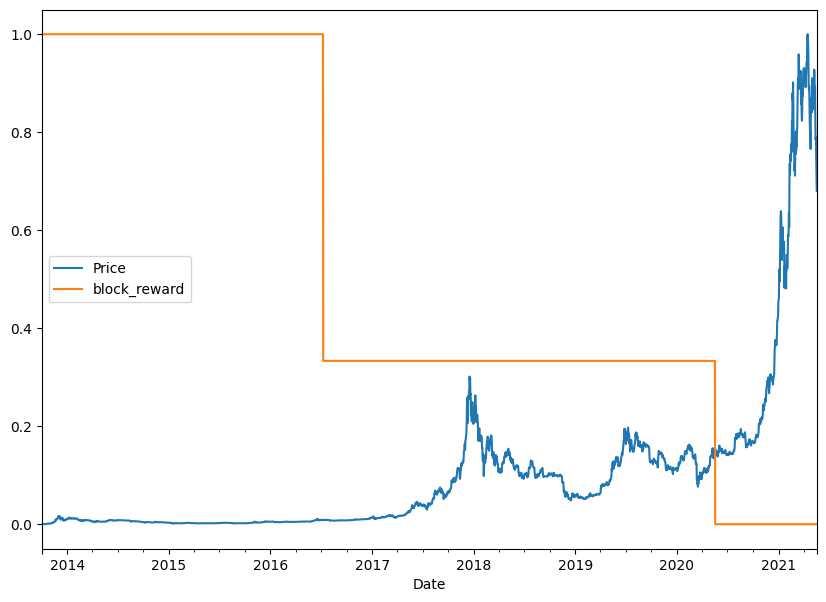

In [99]:
# Plot the block reward vs price over time.
# minmax_scale bütün değerleri 0 la 1 arasına sıkıştırıyor.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale( bitcoin_prices_block[ [ "Price" , "block_reward" ] ] ) ,
    columns = bitcoin_prices_block.columns ,
    index = bitcoin_prices_block.index
    )

scaled_price_block_df.plot(figsize = (10 , 7))

# Making a windowed dataset with pandas

Previously , we have turned our univariate time series into windowed dataset using the helper function above.

However , since we have got multivariate data , these functions wont work.

Not to worry , we can use pandas.DataFrame.shift() method to window our multivariate data.

In [100]:
# Setup dataset parameters
HORIZON = 1
WINDOW_SIZE = 7

In [101]:
# Make a copy of the bitcoin historcal data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price + {i+1}"] = bitcoin_prices_windowed["Price"].shift( periods = i + 1 )

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas dataframe. Yani mesela 2013-10-08	bu tarihteki price+1 den başlayıp price+7 ye kadar olan valuelar bizim bildiğimiz windowumuz train için kullandığımız datamız yani üstteki modellerde nasıl yaptıysak onun aynısı. Price columndaki değer de bizim actual horizonumuz. Yani biz window label ayırma işini aslında pandas dataframe i ile yaptık yaptıgımız baska bir sey degil.

In [102]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price" , axis = 1).astype(np.float32)
# Bu işlem, "price" sütununu veri çerçevesinden kaldırır ve sonucunda "Price" sütunu olmayan yeni bir DataFrame döndürür. Bu nedenle, axis=1 kullanarak sütun bazlı bir işlem gerçekleştirilir. Eğer axis=0 olarak ayarlarsanız, satırlar üzerinde işlem yaparsınız ve belirlediğiniz satırı çıkarırsınız.
# .dropna ile DataFrame imizdeki içinde NAN olan rowların hepsini kaldırıyor.
# Price columnu ayırmamızın sebebi biz X ile windowlarımızı oluşturuyoruz. Price columnu bizim horizon değerlerimizi tutuyor.
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [103]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

# Make train/test sets using indexing

In [104]:
split_size = int(len(X) * 0.8)
X_train , y_train = X[ : split_size] , y[ : split_size]
X_test , y_test = X[ split_size: ] , y[ split_size : ]

len( X_train) , len(y_train)  , len(X_test) , len(y_test)

(2224, 2224, 556, 556)

In [105]:
y_train

Date
2013-10-08     123.032997
2013-10-09     124.049004
2013-10-10     125.961159
2013-10-11     125.279663
2013-10-12     125.927498
                 ...     
2019-11-05    9369.627930
2019-11-06    9326.599609
2019-11-07    9335.751953
2019-11-08    9226.485352
2019-11-09    8794.358398
Name: Price, Length: 2224, dtype: float32

In [106]:
X_train.shape , y_train.shape

((2224, 8), (2224,))

# Model 6 : Same as model 1 but with block_reward

In [107]:
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential(
    [
        layers.Dense(128 , activation = "relu") ,
        layers.Dense(HORIZON)
    ] , name = "model_6_multivariate"
)
# Compile a model
model_6.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                )

# Fit the model
model_6.fit(
    X_train ,
    y_train ,
    epochs = 100 ,
    validation_data = (X_test , y_test) ,
    batch_size = 128 ,
    callbacks = [create_model_checkpoint(model_name = model_6.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 2057.0574

18/18 [==============================] - 2s 67ms/step - loss: 685.7504 - val_loss: 913.7148
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 212.7973 - val_loss: 982.6873
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 164.8567 - val_loss: 961.1115
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 148.6579

18/18 [==============================] - 1s 44ms/step - loss: 147.9699 - val_loss: 783.9980
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 144.0912

18/18 [==============================] - 1s 43ms/step - loss: 141.4305 - val_loss: 756.3146
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 142.6247 - val_loss: 856.2029
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 147.9880

18/18 [==============================] - 1s 30ms/step - loss: 145.1645 - val_loss: 739.8180
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 118.6672

18/18 [==============================] - 0s 29ms/step - loss: 136.4291 - val_loss: 724.9938
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 137.8292 - val_loss: 725.7819
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 131.8416

18/18 [==============================] - 0s 28ms/step - loss: 134.3481 - val_loss: 705.9450
Epoch 11/100
18/18 [==============================] - 0s 4ms/step - loss: 131.5591 - val_loss: 737.7614
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 133.0189 - val_loss: 793.9480
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 135.0712 - val_loss: 714.8589
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 131.1042

18/18 [==============================] - 0s 28ms/step - loss: 129.4556 - val_loss: 681.9279
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8301

18/18 [==============================] - 1s 31ms/step - loss: 129.9705 - val_loss: 676.8784
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8146 - val_loss: 693.0050
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 107.4697

18/18 [==============================] - 0s 28ms/step - loss: 125.1135 - val_loss: 673.1533
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5574 - val_loss: 673.1841
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 126.6957 - val_loss: 691.0831
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 148.0834

18/18 [==============================] - 0s 29ms/step - loss: 123.8883 - val_loss: 661.0991
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 143.7621

18/18 [==============================] - 0s 28ms/step - loss: 125.7466 - val_loss: 653.7191
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 186.9626

18/18 [==============================] - 0s 28ms/step - loss: 123.7645 - val_loss: 649.6221
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 123.4560 - val_loss: 675.8082
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 137.2414

18/18 [==============================] - 0s 28ms/step - loss: 121.8944 - val_loss: 649.2269
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 136.8528

18/18 [==============================] - 0s 28ms/step - loss: 119.9038 - val_loss: 646.5735
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4837

18/18 [==============================] - 0s 28ms/step - loss: 122.9095 - val_loss: 638.3687
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 168.3452

18/18 [==============================] - 1s 29ms/step - loss: 123.4535 - val_loss: 637.3764
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 118.7785 - val_loss: 645.6815
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 114.2942

18/18 [==============================] - 1s 31ms/step - loss: 117.5384 - val_loss: 631.3305
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 133.7268

18/18 [==============================] - 0s 29ms/step - loss: 122.2006 - val_loss: 626.6069
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2173

18/18 [==============================] - 1s 30ms/step - loss: 116.2472 - val_loss: 626.3094
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 107.6341

18/18 [==============================] - 0s 27ms/step - loss: 116.0858 - val_loss: 622.9968
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6289 - val_loss: 634.5608
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4564 - val_loss: 644.1356
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 114.2304

18/18 [==============================] - 1s 56ms/step - loss: 114.2304 - val_loss: 613.5454
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 120.9847 - val_loss: 629.4579
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 118.0130 - val_loss: 628.4551
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 117.9837

18/18 [==============================] - 1s 41ms/step - loss: 116.0854 - val_loss: 607.4379
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 115.5461

18/18 [==============================] - 1s 41ms/step - loss: 113.6843 - val_loss: 605.2307
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0046 - val_loss: 606.3645
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7717 - val_loss: 650.8081
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 117.8721 - val_loss: 625.3909
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4988 - val_loss: 643.3517
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8958 - val_loss: 607.6565
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5300 - val_loss: 625.9067
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2532 - val_loss: 614.9212
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0703 - val_loss: 665.3025
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 0s 28ms/step - loss: 111.6272 - val_loss: 600.9701
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7595 - val_loss: 628.4164
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3456 - val_loss: 707.4147
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 121.5006 - val_loss: 638.8460
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 68.4000

18/18 [==============================] - 0s 28ms/step - loss: 118.2253 - val_loss: 591.1803
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 95.8100

18/18 [==============================] - 0s 29ms/step - loss: 109.2544 - val_loss: 586.4890
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3897 - val_loss: 587.0807
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6607 - val_loss: 762.5306
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2202 - val_loss: 737.4195
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 116.1917 - val_loss: 588.5759
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2882 - val_loss: 623.9558
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0690 - val_loss: 593.3564
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 134.2819

18/18 [==============================] - 0s 28ms/step - loss: 108.7127 - val_loss: 581.6453
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 74.2326

18/18 [==============================] - 0s 28ms/step - loss: 107.9387 - val_loss: 581.1396
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2220 - val_loss: 666.0395
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9299 - val_loss: 603.8950
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 131.6408

18/18 [==============================] - 0s 29ms/step - loss: 110.0676 - val_loss: 577.1331
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4442 - val_loss: 577.6738
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9094 - val_loss: 648.9056
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1447 - val_loss: 671.5055
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 126.4843 - val_loss: 624.3647
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 119.1505

18/18 [==============================] - 1s 29ms/step - loss: 130.0759 - val_loss: 574.7648
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4323 - val_loss: 588.7531
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9476 - val_loss: 576.4706
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4832 - val_loss: 578.2305
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2153 - val_loss: 582.5165
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0916 - val_loss: 578.0710
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1562 - val_loss: 574.9417
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 81.7259

18/18 [==============================] - 0s 29ms/step - loss: 107.2548 - val_loss: 571.4648
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8197 - val_loss: 587.9951
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 106.2162

18/18 [==============================] - 1s 29ms/step - loss: 111.7762 - val_loss: 570.7973
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 106.1769 - val_loss: 594.7400
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7318 - val_loss: 573.4330
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9819 - val_loss: 572.1774
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3793 - val_loss: 702.5372
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 114.6669 - val_loss: 634.7655
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 108.4069 - val_loss: 592.5024
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 110.0709

18/18 [==============================] - 0s 28ms/step - loss: 106.6438 - val_loss: 569.9766
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0951 - val_loss: 586.3661
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9114 - val_loss: 585.4695
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1279 - val_loss: 581.1165
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2668 - val_loss: 585.0165
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3348 - val_loss: 573.9030
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1395 - val_loss: 630.4500
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8215 - val_loss: 601.9785
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6198 - val_loss: 573.4443
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 10

18/18 [==============================] - 0s 29ms/step - loss: 106.9007 - val_loss: 568.6193
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9046 - val_loss: 703.7157


In [108]:
# Load the best performing model_6
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_multivariate/")
model_6.evaluate(X_test , y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.6191


568.619140625

In [109]:
# Make predictions
model_6_preds = model_6.predict(X_test)
model_6_preds.shape


18/18 [==============================] - 0s 2ms/step


(556, 1)

In [110]:
y_test.shape

(556,)

In [111]:
model_6_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_6_preds)
)
model_6_results

{'mae': 568.6191,
 'mse': 1166944.0,
 'rmse': 1080.2518,
 'mape': 2.5424228,
 'mase': 0.99890625}

# Model 7 : N-BEATS Algorithm
Lets now try to build the biggest baddest ( though maybe not the baddest , as in , it performly very well ) time series forecasting model we have built so far.

More spesifically , we are going to replicating the algorithm in figure 1 from the paper : https://arxiv.org/pdf/1905.10437.pdf

* We will see how to use tensorflow layer subclassing ( to make our own custom layers.)
* Get experience using the functional API to create a custom architecture.
* Potentially get state of the art results on our problem.

### Building and testing the NBEATS block layer

Because the NBEATS block layer doesnt exist in tensorflow , we have got to create this.

To create custom layers and models in tensorflow , we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

Note : Fully connected layers means Dense layers.


In [112]:
# Create NBeatBlock custom layer. We are using subclassing because to create a layer in a network doesnt already exist in tensorflow.
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self ,
               input_size : int ,
               theta_size : int ,
               horizon : int ,
               n_neurons : int ,
               n_layers : int ,
               **kwargs   # the **kwargs argument takes care of all the arguments for the parent class (e.g. input_shape , trainable , name )(bütün default valueları biz girmemiş olsak bile **kwargs ile onları da default olarak eklemiş oluyoruz.)
               ):
    super().__init__(**kwargs)
    self.input_size = input_size   # If you want to initialize some variables in class , you should use self.variable_name = something.
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons , activation = "relu") for _ in range(n_layers)]  # We will put 4 for n_layers later.

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size , activation = "linear" , name = "theta")

    # Now we will describe our data how to go from the inputs to outputs with call method. (call method layer olustururken her zaman zorunlu)
  def call(self , inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)   # x will get updated contiunally as it passes through each layer in the fully connected stack.
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast , forecast = theta[ : , : self.input_size ] , theta[ : , -self.horizon : ]
    return backcast , forecast    # It is trying to use the backcast to improve its forecast positions.
    # backcast, theta'nın başlangıcından input_size boyutuna kadar olan bölümünü temsil eder. Bu, geçmiş zaman adımlarına ilişkin tahminlemeyi içerir.
    # forecast, theta'nın sonundan -horizon boyutuna kadar olan bölümünü temsil eder. Bu, gelecekteki zaman adımlarına ilişkin tahminlemeyi içerir.





Lets test our NBeatsBlock class

To do , we will make some dummy inputs and outputs



In [113]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(
    input_size = WINDOW_SIZE ,
    theta_size = WINDOW_SIZE + HORIZON , # Because our theta includes backcast and forecast , backcast acts like our input and forecast acts like our output, so we should use WINDOW_SIZE + HORIZON
    horizon = HORIZON ,
    n_neurons = 128 ,
    n_layers = 4
)

In [114]:
# Create a dummy inputs (have to be same shape with input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,  axis = 0)  #  Dense layers should have (batch_size , input_dim) shape , so it would be 2D input with shape  (batch_size , input_dim)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [115]:
# Pass dummy inputs to dummy NBeatsBlock
backcast , forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f"Backcast : {tf.squeeze(backcast.numpy())}")
print(f"Forecast : {tf.squeeze(forecast.numpy())}")

Backcast : [ 0.2452741  -0.95345485  0.8392603   0.0886066  -0.10089447 -0.10050286
  0.10196467]
Forecast : 0.04225119948387146


### Preparing data for the N-BEATS algorithm using 'tf.data' for faster training.

In [116]:
HORIZON = 1
WINDOW_SIZE = 7

In [117]:
# Create N-BEATS data inputs ( N-BEATS works with univariate time series )
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [118]:
# Add windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)

bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [124]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [125]:
# Time to make our dataset performant using tf.data
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset ,train_labels_dataset ))
test_dataset = tf.data.Dataset.zip((test_features_dataset ,test_labels_dataset ))

In [126]:
train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters , we will tune our parameters using our paper , Table 18

We are using N-BEATS G(generic) algorithm and also we are going to use Daily forecast (Dly)

In [127]:
# Values from N-BEATS papers.
N_EPOCHS = 5000 # In paper , they say iterations for epochs.
N_NEURONS = 512 # In paper , they say Width
N_LAYERS = 4 # Our block network has 4 fully connected layers.
N_STACKS = 30 # Our algorihtm needs 30 stacks (written in paper)

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE , THETA_SIZE

(7, 8)